In [118]:
!pip install PySastrawi

In [119]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import csv
import numpy as np
import seaborn as sns
import nltk
from nltk.tokenize import word_tokenize
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from wordcloud import WordCloud
from keras.models import load_model
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import folium
from folium.plugins import HeatMap
import requests
from PIL import Image
from io import BytesIO

In [120]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rizky\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [121]:
file_loc = "https://raw.githubusercontent.com/rizkyyanuark/College/main/datamining/combined.csv"
data_scrape = pd.read_csv(file_loc)
data_scrape

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1785300561094644037,Tue Apr 30 13:29:57 +0000 2024,0,selain kasus salah sasaran kipk ada jg yg dise...,1785300561094644037,NaN,NaN,in,NaN,0,0,0,https://twitter.com/jiegree/status/17853005610...,1344526407938916357,jiegree
1,1785300394010452166,Tue Apr 30 13:29:17 +0000 2024,0,Makin banyak yang ke spill yang kipk tapi tern...,1785300394010452166,NaN,NaN,in,Johnny,0,0,0,https://twitter.com/whosrahmah/status/17853003...,1187581909267701761,whosrahmah
2,1785253406166393056,Tue Apr 30 13:26:44 +0000 2024,0,@personality404_ the thing isss apakah that in...,1785299751065485367,NaN,personality404_,in,NaN,0,0,0,https://twitter.com/gagagagawrra/status/178529...,1662451301547118592,gagagagawrra
3,1785299607414886693,Tue Apr 30 13:26:10 +0000 2024,0,Banyak amat kipk salah sasaran inimah yg salah...,1785299607414886693,NaN,NaN,in,♡,0,0,0,https://twitter.com/samohaec/status/1785299607...,1734519974390317056,samohaec
4,1785270395622539737,Tue Apr 30 13:24:13 +0000 2024,0,@boomboomna @undipmenfess ini undip bnyk bener...,1785299116396102054,NaN,boomboomna,in,NaN,0,1,0,https://twitter.com/Nazifamulya/status/1785299...,1160811689937235968,Nazifamulya
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4026,1784890813501391093,Mon Apr 29 10:41:01 +0000 2024,0,@markfsoul mmf zan tapi aku bukan penerima kip...,1784895657053913391,NaN,markfsoul,in,Jakarta Selatan,0,1,0,https://twitter.com/ssenabluu/status/178489565...,2397505423,ssenabluu
4027,1328338212721311746,Mon Apr 29 10:40:46 +0000 2024,1,@digidegu Ohhh gini kelakukan penerima KIPK go...,1784895594584031590,NaN,digidegu,in,NaN,1,1,0,https://twitter.com/if_amall/status/1784895594...,1668011559547961344,if_amall
4028,1784895346692554790,Mon Apr 29 10:39:47 +0000 2024,0,Itu penerima kipk di kuliti habis2an sampe dia...,1784895346692554790,NaN,NaN,in,NaN,0,0,0,https://twitter.com/PMunceri/status/1784895346...,1784001049818505216,PMunceri
4029,1784895317474730334,Mon Apr 29 10:39:40 +0000 2024,0,Penerima kipk kan dah ada indikatornya ya... k...,1784895317474730334,NaN,NaN,in,NaN,0,1,0,https://twitter.com/ncddream/status/1784895317...,814624634498752512,ncddream


In [122]:
data_scrape = data_scrape[['created_at', 'full_text']].rename(columns={'created_at': 'date', 'full_text': 'tweet'}).drop_duplicates()
data_scrape

,date,tweet
0,Tue Apr 30 13:29:57 +0000 2024,selain kasus salah sasaran kipk ada jg yg dise...
1,Tue Apr 30 13:29:17 +0000 2024,Makin banyak yang ke spill yang kipk tapi tern...
2,Tue Apr 30 13:26:44 +0000 2024,@personality404_ the thing isss apakah that in...
3,Tue Apr 30 13:26:10 +0000 2024,Banyak amat kipk salah sasaran inimah yg salah...
4,Tue Apr 30 13:24:13 +0000 2024,@boomboomna @undipmenfess ini undip bnyk bener...
...,...,...
4026,Mon Apr 29 10:41:01 +0000 2024,@markfsoul mmf zan tapi aku bukan penerima kip...
4027,Mon Apr 29 10:40:46 +0000 2024,@digidegu Ohhh gini kelakukan penerima KIPK go...
4028,Mon Apr 29 10:39:47 +0000 2024,Itu penerima kipk di kuliti habis2an sampe dia...
4029,Mon Apr 29 10:39:40 +0000 2024,Penerima kipk kan dah ada indikatornya ya... k...


In [123]:
jumlah_tweet = data_scrape["tweet"].count()
print(f"Jumlah tweet: {jumlah_tweet}")
jumlah_nan = data_scrape.isnull().sum().sum()
print(f"Jumlah data NaN: {jumlah_nan}")

Jumlah tweet: 3938
Jumlah data NaN: 0


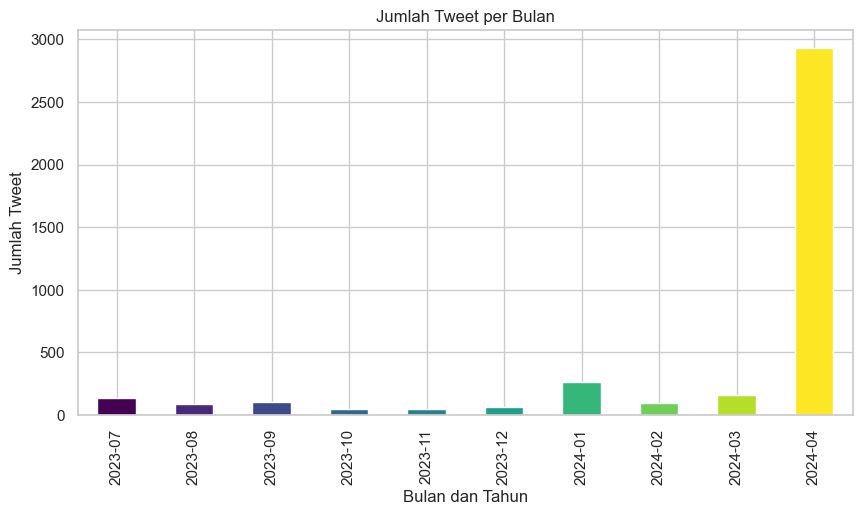

In [124]:
tweets = data_scrape.copy()
tweets['date'] = pd.to_datetime(tweets['date'], format='%a %b %d %H:%M:%S +0000 %Y')
tweets['YearMonth'] = tweets['date'].dt.to_period('M')
monthly_tweets = tweets.groupby('YearMonth').size()
colors = plt.cm.viridis(np.linspace(0, 1, len(monthly_tweets)))
monthly_tweets.plot(kind='bar', figsize=(10, 5), color=colors)
plt.xlabel("Bulan dan Tahun")
plt.ylabel("Jumlah Tweet")
plt.title("Jumlah Tweet per Bulan")
plt.grid(True)
plt.show()
data_scrape = data_scrape[['tweet']]

In [125]:
stopword_bahasa = pd.read_csv('https://raw.githubusercontent.com/rizky-22017-mhs-unesa-ac-id/Sentiment-Analysis-of-KIP-Recipients-based-on-Tweets-from-X/main/Dataset/TextNormalization/stopwordbahasa.csv', encoding='latin-1')
stopword_bahasa = stopword_bahasa.rename(columns={0: 'stop'})
# stopword_bahasa.head()

kamus_alay = pd.read_csv('https://raw.githubusercontent.com/rizky-22017-mhs-unesa-ac-id/Sentiment-Analysis-of-KIP-Recipients-based-on-Tweets-from-X/main/Dataset/TextNormalization/kamus_alay.csv', header=None, encoding='latin-1')
kamus_alay = kamus_alay.rename(columns={0: 'original',
                                     1: 'replacement'})
kamus_alay_map = dict(zip(kamus_alay['original'], kamus_alay['replacement']))
# kamus_alay.head()

kamus_singkatan = pd.read_csv('https://raw.githubusercontent.com/rizky-22017-mhs-unesa-ac-id/Sentiment-Analysis-of-KIP-Recipients-based-on-Tweets-from-X/main/Dataset/TextNormalization/kamus_singkatan.csv', sep=';', encoding='latin-1')
kamus_singkatan.columns = ['Column1', 'Column2']
kamus_singkatan = kamus_singkatan.rename(columns={'Column1': 'original', 'Column2': 'replacement'})
kamus_singkatan_map = dict(zip(kamus_singkatan['original'], kamus_singkatan['replacement']))
# kamus_singkatan.head()

In [126]:
import openpyxl
# URL langsung ke file Excel di OneDrive
url = 'https://onedrive.live.com/download?cid=87800D9176D9AB3B&resid=87800D9176D9AB3B%2138059&authkey=%21AEiLURQ1anJ3daY'
info_univ = pd.read_excel(url, engine='openpyxl')['Singkatan'].tolist()
universitas_info = pd.read_excel(url, engine='openpyxl')
def clean_text(text):
    text = text.lower()
    text = re.sub('\n', ' ', text) # Remove every newline character
    text = re.sub('user', ' ', text) # Remove every occurrence of the word 'user'
    text = re.sub('rt', ' ', text) # Remove every retweet symbol
    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', ' ', text) # Remove every URL
    text = re.sub('https?://t\.me/[^\s]+', ' ', text) # Remove every Telegram link
    text = re.sub ('[^0-9a-zA-Z]+', ' ', text) # Remove every non-alphanumeric character
    # Remove every username not in the exclusion list
    for username in re.findall(r'@[A-Za-z0-9_]+', text):
        if username[1:] not in info_univ: # Exclude the '@' symbol when checking the username
            text = text.replace(username, ' ')

    text = re.sub('  +', ' ', text) # Remove extra spaces
    return text

In [127]:
data_scrape['cleaning'] = data_scrape.tweet.apply(clean_text)
data_scrape.head()

,tweet,cleaning
0,selain kasus salah sasaran kipk ada jg yg dise...,selain kasus salah sasaran kipk ada jg yg dise...
1,Makin banyak yang ke spill yang kipk tapi tern...,makin banyak yang ke spill yang kipk tapi tern...
2,@personality404_ the thing isss apakah that in...,personality404 the thing isss apakah that inf...
3,Banyak amat kipk salah sasaran inimah yg salah...,banyak amat kipk salah sasaran inimah yg salah...
4,@boomboomna @undipmenfess ini undip bnyk bener...,boomboomna undipmenfess ini undip bnyk bener ...


In [128]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Text preprocessing functions from previous script
def tokenizingText(text): # Tokenizing or splitting a string, text into a list of tokens
    text = word_tokenize(text)
    return text

def normalize_alay(text):
    return ' '.join([kamus_alay_map[word] if word in kamus_alay_map else word for word in text.split(' ')])

def normalize_singkatan(text):
    return ' '.join([kamus_singkatan_map[word] if word in kamus_singkatan_map else word for word in text.split(' ')])

def remove_stopword(text):
    text = ' '.join([ ' ' if word in stopword_bahasa.ada.values else word for word in text.split(' ')])
    text = re.sub('  +', ' ', text) # Remove extra spaces
    text = text.strip()
    return text

def stemming(text_cleaning):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    do = []
    for w in text_cleaning:
        dt = stemmer.stem(w)
        do.append(dt)
    return ' '.join(do)

# Modified clean_text function that calls preprocessing functions from previous script
def preprocess(text):
    text = normalize_alay(text) # Normalize text using alay_dict_map
    text = normalize_singkatan(text) # Normalize text using alay_dict_map2
    text = remove_stopword(text) # Remove stopwords from text
    text = tokenizingText(text)
    text = stemming(text)
    return text

In [129]:
data_scrape['preprocessing'] = data_scrape['cleaning'].apply(preprocess)
data_scrape

,tweet,cleaning,preprocessing
0,selain kasus salah sasaran kipk ada jg yg dise...,selain kasus salah sasaran kipk ada jg yg dise...,salah sasar kipk ada program keluarga harap pa...
1,Makin banyak yang ke spill yang kipk tapi tern...,makin banyak yang ke spill yang kipk tapi tern...,spill kipk hidup boros alias salah sasar kasih...
2,@personality404_ the thing isss apakah that in...,personality404 the thing isss apakah that inf...,personality404 the thing isss that influencer ...
3,Banyak amat kipk salah sasaran inimah yg salah...,banyak amat kipk salah sasaran inimah yg salah...,kipk salah sasar inimah salah seleksi kipk nya...
4,@boomboomna @undipmenfess ini undip bnyk bener...,boomboomna undipmenfess ini undip bnyk bener ...,boomboomna undipmenfess undip tahi jadi kipk s...
...,...,...,...
4026,@markfsoul mmf zan tapi aku bukan penerima kip...,markfsoul mmf zan tapi aku bukan penerima kip...,markfsoul mmf zan terima kipk ukt 8jt ter seok...
4027,@digidegu Ohhh gini kelakukan penerima KIPK go...,digidegu ohhh gini kelakukan penerima kipk go...,digidegu ohhh laku terima kipk goblok pembokep
4028,Itu penerima kipk di kuliti habis2an sampe dia...,itu penerima kipk di kuliti habis2an sampe dia...,terima kipk kulit habis2an rep base friends wi...
4029,Penerima kipk kan dah ada indikatornya ya... k...,penerima kipk kan dah ada indikatornya ya kalo...,terima kipk ada indikator ya rasa anak sesuai ...


In [133]:
# Define constants
num_words = 5000
sentiment_classes = ['Negative', 'Neutral', 'Positive']

# Load the pre-trained model
model = load_model(r'C:\Users\rizky\OneDrive\Dokumen\GitHub\Sentiment-Analysis-of-KIP-Recipients-based-on-Tweets-from-X\best_model.h5')

In [134]:
# Initialize and fit the tokenizer
tokenizer = Tokenizer(num_words=num_words, oov_token='OOV')
tokenizer.fit_on_texts(data_scrape['preprocessing'])

# Transform the tweets to sequences
sequences = tokenizer.texts_to_sequences(data_scrape['preprocessing'])

# Pad the sequences with max_len = 49
padded_sequences = pad_sequences(sequences, maxlen=49, padding='post')

In [135]:
# Fungsi untuk mencocokkan singkatan dan mengisi kolom baru
def update_university_info(row, universitas_info):
    for _, uni_row in universitas_info.iterrows():
        if pd.notna(row['preprocessing']) and uni_row['Singkatan'] in row['preprocessing']:
            return pd.Series([uni_row['Nama Universitas'], uni_row['longitude'], uni_row['latitude']])
    return pd.Series([pd.NA, pd.NA, pd.NA])

# Terapkan fungsi ke data_scrape
data_scrape[['Nama Universitas', 'longitude', 'latitude']] = data_scrape.apply(update_university_info, axis=1, universitas_info=universitas_info)

# Lanjutkan dengan proses prediksi sentimen
predictions = model.predict(padded_sequences).argmax(axis=1)
predicted_labels = [sentiment_classes[prediction] for prediction in predictions]
data_scrape['label'] = predicted_labels

# Tampilkan DataFrame yang telah diperbarui
data_scrape

124/124 [==============================] - 6s 11ms/step


,tweet,cleaning,preprocessing,Nama Universitas,longitude,latitude,label
0,selain kasus salah sasaran kipk ada jg yg dise...,selain kasus salah sasaran kipk ada jg yg dise...,salah sasar kipk ada program keluarga harap pa...,<NA>,<NA>,<NA>,Negative
1,Makin banyak yang ke spill yang kipk tapi tern...,makin banyak yang ke spill yang kipk tapi tern...,spill kipk hidup boros alias salah sasar kasih...,<NA>,<NA>,<NA>,Negative
2,@personality404_ the thing isss apakah that in...,personality404 the thing isss apakah that inf...,personality404 the thing isss that influencer ...,<NA>,<NA>,<NA>,Negative
3,Banyak amat kipk salah sasaran inimah yg salah...,banyak amat kipk salah sasaran inimah yg salah...,kipk salah sasar inimah salah seleksi kipk nya...,<NA>,<NA>,<NA>,Negative
4,@boomboomna @undipmenfess ini undip bnyk bener...,boomboomna undipmenfess ini undip bnyk bener ...,boomboomna undipmenfess undip tahi jadi kipk s...,Universitas Diponegoro,110.440107,-7.04837,Positive
...,...,...,...,...,...,...,...
4026,@markfsoul mmf zan tapi aku bukan penerima kip...,markfsoul mmf zan tapi aku bukan penerima kip...,markfsoul mmf zan terima kipk ukt 8jt ter seok...,<NA>,<NA>,<NA>,Positive
4027,@digidegu Ohhh gini kelakukan penerima KIPK go...,digidegu ohhh gini kelakukan penerima kipk go...,digidegu ohhh laku terima kipk goblok pembokep,<NA>,<NA>,<NA>,Negative
4028,Itu penerima kipk di kuliti habis2an sampe dia...,itu penerima kipk di kuliti habis2an sampe dia...,terima kipk kulit habis2an rep base friends wi...,<NA>,<NA>,<NA>,Positive
4029,Penerima kipk kan dah ada indikatornya ya... k...,penerima kipk kan dah ada indikatornya ya kalo...,terima kipk ada indikator ya rasa anak sesuai ...,<NA>,<NA>,<NA>,Negative


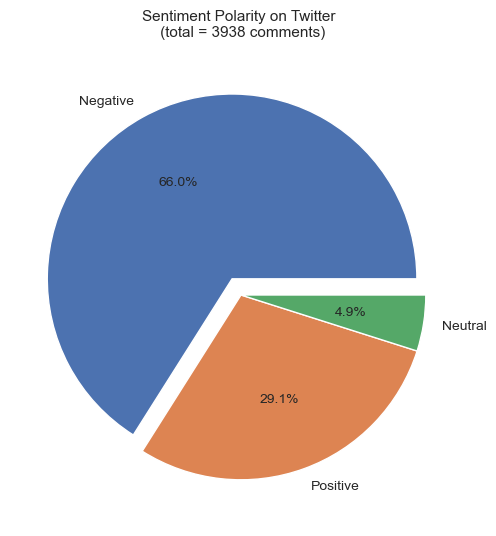

In [144]:
fig, ax = plt.subplots(figsize = (6, 6))
sizes = [count for count in data_scrape['label'].value_counts()]
labels = list(data_scrape['label'].value_counts().index)
explode = (0.1, 0, 0)
ax.pie(x = sizes, labels = labels, autopct = '%1.1f%%', explode = explode, textprops={'fontsize': 10})
ax.set_title('Sentiment Polarity on Twitter \n (total = 3938 comments)', fontsize = 11, pad = 20)
plt.show()

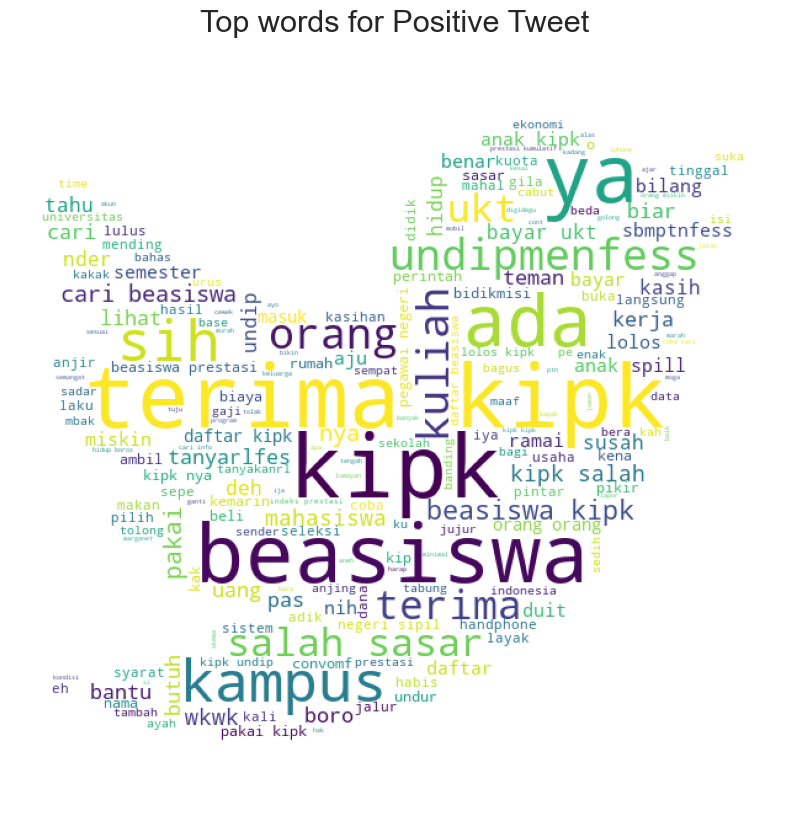

In [137]:
# Ambil gambar dari URL untuk digunakan sebagai mask
url = "https://image.freepik.com/free-icon/twitter-logo_318-40459.jpg"
response = requests.get(url)
twitter_mask = np.array(Image.open(BytesIO(response.content)))
# Buat WordCloud
wc = WordCloud(
    background_color='white',
    max_words=200,
    mask=twitter_mask,
)
# Generate WordCloud dari teks positif
wc.generate(' '.join(text for text in data_scrape.loc[data_scrape['label'] == 'Positive', 'preprocessing']))
# Tampilkan WordCloud
plt.figure(figsize=(18,10))
plt.title('Top words for Positive Tweet', fontdict={'size': 22,  'verticalalignment': 'bottom'})
plt.imshow(wc)
plt.axis("off")
plt.show()

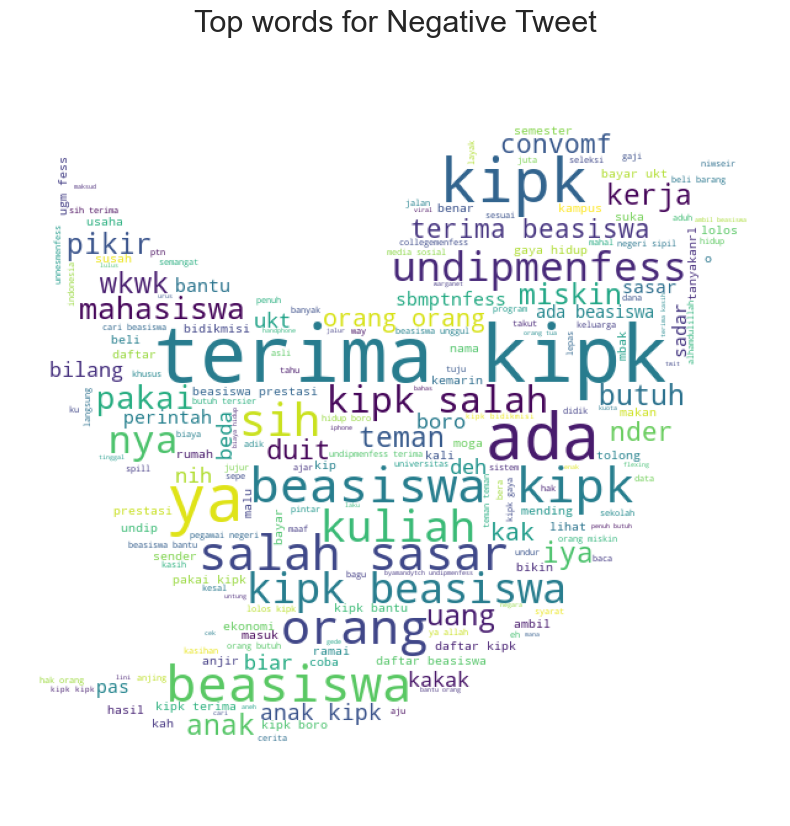

In [138]:
# Buat WordCloud
wc = WordCloud(
    background_color='white',
    max_words=200,
    mask=twitter_mask,
)

# Generate WordCloud dari teks positif
wc.generate(' '.join(text for text in data_scrape.loc[data_scrape['label'] == 'Negative', 'preprocessing']))

# Tampilkan WordCloud
plt.figure(figsize=(18,10))
plt.title('Top words for Negative Tweet', fontdict={'size': 22,  'verticalalignment': 'bottom'})
plt.imshow(wc)
plt.axis("off")
plt.show()

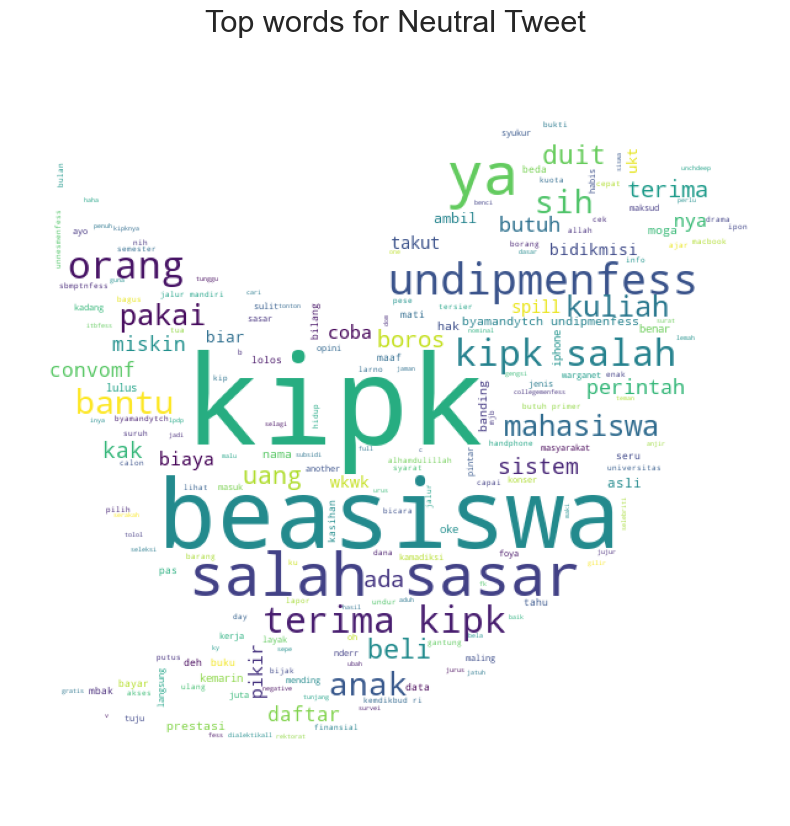

In [139]:
wc = WordCloud(
    background_color='white',
    max_words=200,
    mask=twitter_mask,
)
wc.generate(' '.join(text for text in data_scrape.loc[data_scrape['label'] == 'Neutral', 'preprocessing']))
plt.figure(figsize=(18,10))
plt.title('Top words for Neutral Tweet',
          fontdict={'size': 22,  'verticalalignment': 'bottom'})
plt.imshow(wc)
plt.axis("off")
plt.show()

In [140]:
# Filter hanya data dengan label negatif
negative_data = data_scrape[data_scrape['label'] == 'Negative']

# Menghitung jumlah kemunculan setiap lokasi untuk data dengan label negatif
location_counts = negative_data.groupby(['latitude', 'longitude']).size().reset_index(name='count')

# Membuat peta dengan folium
map = folium.Map(location=[negative_data['latitude'].mean(), negative_data['longitude'].mean()], zoom_start=5)

# Membuat HeatMap dengan tingkat kepopuleran untuk data dengan label negatif
heat_data = [[row['latitude'], row['longitude'], row['count']] for index, row in location_counts.iterrows()]
HeatMap(heat_data, radius=15, blur=20).add_to(map)

# # Menambahkan marker untuk setiap titik data dengan label negatif pada peta
# for index, row in negative_data.iterrows():
#     folium.Marker([row['latitude'], row['longitude']], popup=row['Nama Universitas']).add_to(map)

# Menampilkan peta
map

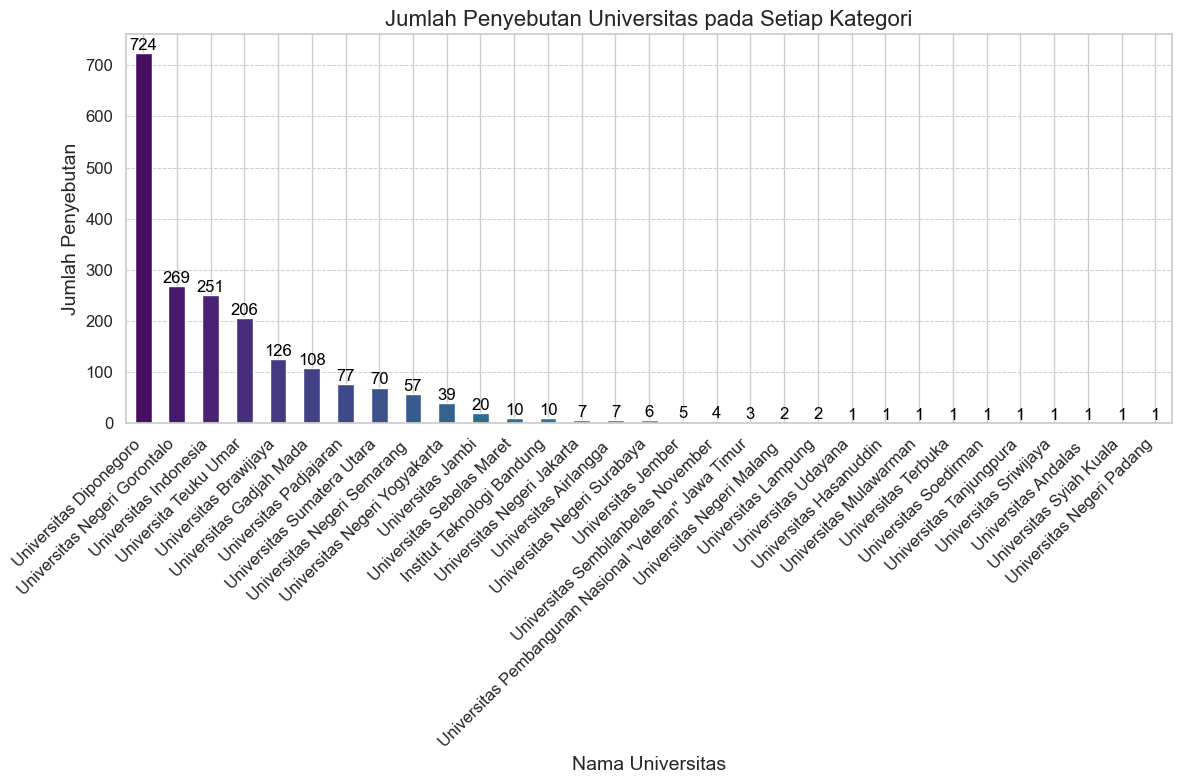

In [141]:
# Menggunakan seaborn untuk mengatur gaya visual
sns.set(style="whitegrid")

# Anggaplah Anda sudah memiliki DataFrame `data_scrape` yang berisi kolom 'Nama Universitas'

# Menghitung jumlah universitas yang disebutkan dalam data
label_counts = data_scrape['Nama Universitas'].value_counts()

# Membuat figure dan axes
plt.figure(figsize=(12, 8))
bars = label_counts.plot(kind='bar', color=sns.color_palette("viridis", len(label_counts)))

# Menambahkan judul dan label sumbu
plt.title('Jumlah Penyebutan Universitas pada Setiap Kategori', fontsize=16)
plt.xlabel('Nama Universitas', fontsize=14)
plt.ylabel('Jumlah Penyebutan', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
# Menambahkan grid
plt.grid(axis='y', linestyle='--', linewidth=0.7)
# Menambahkan label jumlah di atas setiap batang
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1, str(int(bar.get_height())),
             ha='center', va='bottom', fontsize=12, color='black')

# Menambahkan layout yang rapi
plt.tight_layout()
# Menampilkan plot
plt.show()

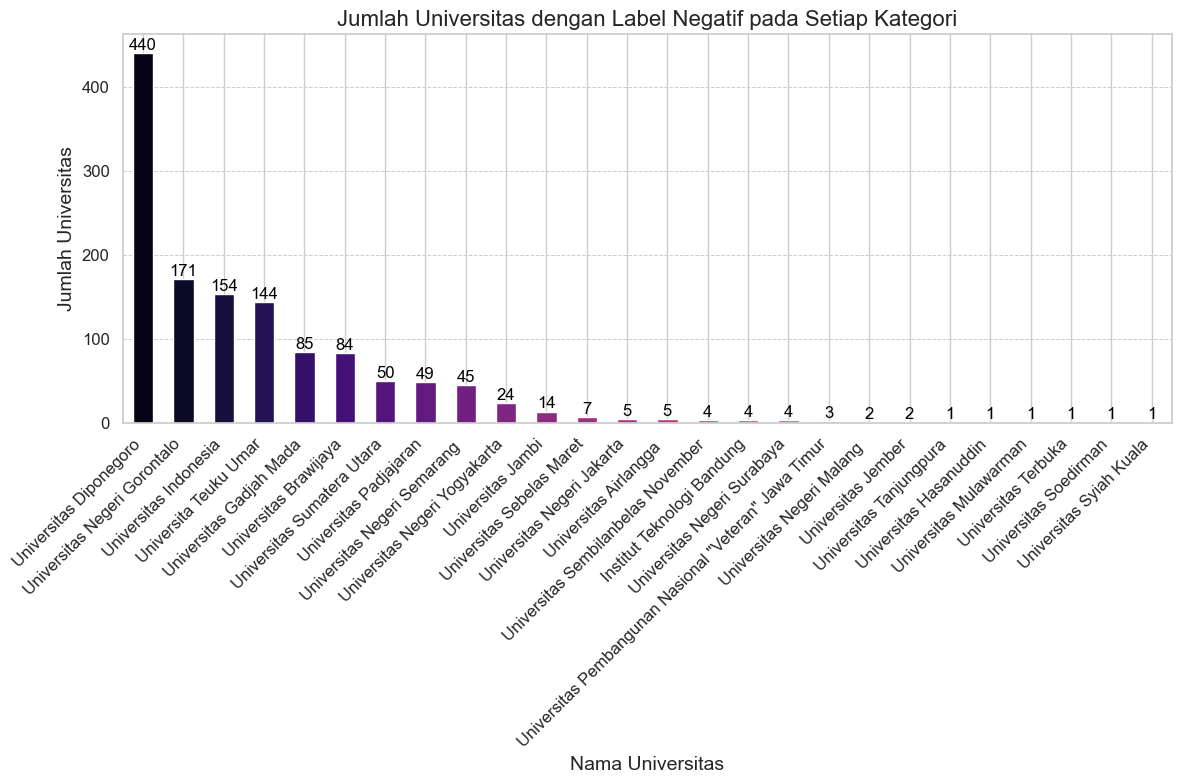

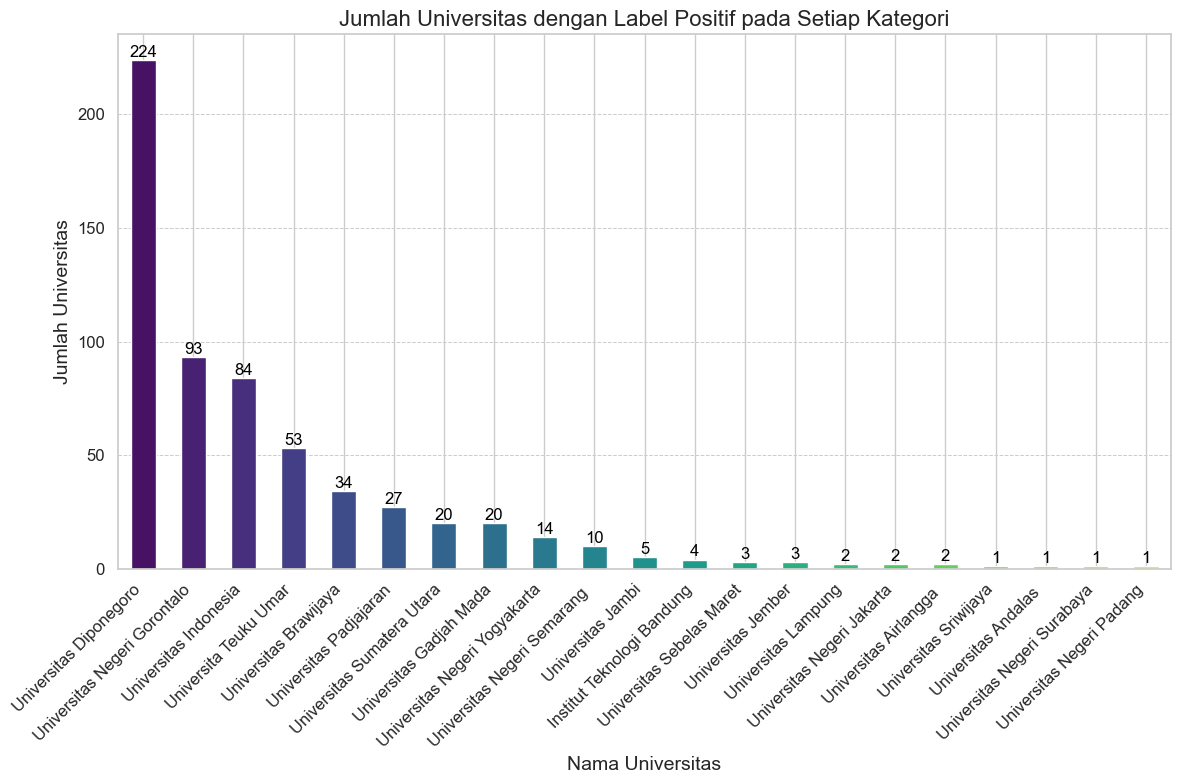

In [142]:
# Menggunakan seaborn untuk mengatur gaya visual
sns.set(style="whitegrid")

# Anggaplah Anda sudah memiliki DataFrame `data_scrape` yang berisi kolom 'label' dan 'Nama Universitas'

# Filter hanya data dengan label negatif
negative_data = data_scrape[data_scrape['label'] == 'Negative']
positive_data = data_scrape[data_scrape['label'] == 'Positive']

# Menghitung jumlah universitas dengan label negatif untuk setiap kategori
negative_label_counts = negative_data['Nama Universitas'].value_counts()
positive_label_counts = positive_data['Nama Universitas'].value_counts()

# Plot diagram batang untuk label negatif
plt.figure(figsize=(12, 8))
bars_negative = negative_label_counts.plot(kind='bar', color=sns.color_palette("magma", len(negative_label_counts)))
plt.title('Jumlah Universitas dengan Label Negatif pada Setiap Kategori', fontsize=16)
plt.xlabel('Nama Universitas', fontsize=14)
plt.ylabel('Jumlah Universitas', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', linewidth=0.7)
for bar in bars_negative.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1, str(int(bar.get_height())), 
             ha='center', va='bottom', fontsize=12, color='black')
plt.tight_layout()
plt.show()

# Plot diagram batang untuk label positif
plt.figure(figsize=(12, 8))
bars_positive = positive_label_counts.plot(kind='bar', color=sns.color_palette("viridis", len(positive_label_counts)))
plt.title('Jumlah Universitas dengan Label Positif pada Setiap Kategori', fontsize=16)
plt.xlabel('Nama Universitas', fontsize=14)
plt.ylabel('Jumlah Universitas', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', linewidth=0.7)
for bar in bars_positive.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1, str(int(bar.get_height())), 
             ha='center', va='bottom', fontsize=12, color='black')
plt.tight_layout()
plt.show()


In [ ]:
# df = data_scrape['tweet','label']
# df

KeyError: ('tweet', 'label')

In [143]:
# Save the updated DataFrame to a CSV file
output_file = 'predicted_data.csv'
data_scrape.to_csv(output_file, index=False)